# Neural Network - MNIST Classification


### Import Libs

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

Using TensorFlow backend.


### Define one hot encode function

In [2]:
def one_hot_encode(x, num_classes):
    one_hot = np.zeros([len(x), num_classes])
    for i in enumerate(x):
        one_hot[(i[0], i[1])] = 1
    return one_hot

### Read Data

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Text(0.5, 1.0, '2')

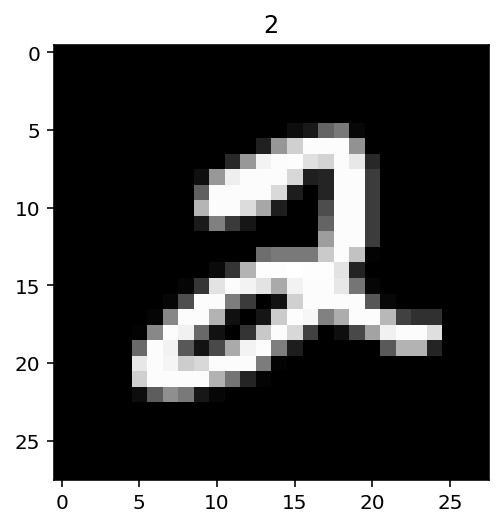

In [4]:
plt.imshow(train_X[5], cmap=plt.get_cmap('gray'))
plt.title(train_y[5])

### Normalize data

In [5]:
train_X = train_X.astype(np.float32)
train_X /= 255.0

test_X = test_X.astype(np.float32)
test_X /= 255.0

### Flatenize inputs

In [6]:
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1] * train_X.shape[2])
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1] * test_X.shape[2])

### Encode outputs

In [7]:
train_y = one_hot_encode(train_y, 10)
test_y = one_hot_encode(test_y, 10)

### Build Neural Network

- Input layer size: train_X.shape[1]
- First hidden layer size: 98
- Dropout: 20%
- Second hidden layer size: 49
- Dropout: 20%
- Adam Optimizer

In [8]:
RANDOM_SEED = 42
tf.set_random_seed(RANDOM_SEED)

tf.reset_default_graph()

learning_rate = 0.01
epoch = 300
interval = 10
batch_size = 600
n_batches = train_X.shape[0]//batch_size

# Layer's sizes
x_size = train_X.shape[1]   # Number of input nodes
h_size = 98                 # Number of hidden nodes
h_size2 = 98                # Number of hidden nodes
h_size3 = 49                # Number of hidden nodes
y_size = train_y.shape[1]   # Number of outcomes

# Symbols
X = tf.placeholder(tf.float32, shape=[None, x_size], name='X')
y = tf.placeholder(tf.float32, shape=[None, y_size], name='y')
rate = tf.placeholder(tf.float32)

# Weight initializations
w1 = tf.Variable(tf.random_normal(shape=(x_size, h_size)))
b1 = tf.Variable(tf.random_normal(shape=[h_size]))
w2 = tf.Variable(tf.random_normal(shape=(h_size, h_size2)))
b2 = tf.Variable(tf.random_normal(shape=[h_size2]))
w3 = tf.Variable(tf.random_normal(shape=(h_size2, h_size3)))
b3 = tf.Variable(tf.random_normal(shape=[h_size3]))
w4 = tf.Variable(tf.random_normal(shape=(h_size3, y_size)))
b4 = tf.Variable(tf.random_normal(shape=[y_size]))

# Operations
hidden_output = tf.nn.sigmoid(tf.add(tf.matmul(X, w1), b1))
dropout = tf.nn.dropout(hidden_output, rate=rate)
hidden_output2 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w2), b2))
dropout2 = tf.nn.dropout(hidden_output2, rate=rate)
hidden_output3 = tf.nn.sigmoid(tf.add(tf.matmul(dropout, w3), b3))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output3, w4), b4), name='final_output')

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.AdamOptimizer().minimize(loss)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Run SGD
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
losses = {'train':[], 'validation':[]}

for e in range(epoch):
    idxs = np.random.permutation(train_X.shape[0]) #shuffled ordering
    random_X = train_X[idxs]
    random_y = train_y[idxs]
    for i in range(n_batches):
        batch_X = random_X[i * batch_size:(i+1) * batch_size]
        batch_y = random_y[i * batch_size:(i+1) * batch_size]
        sess.run(optimizer,feed_dict = {X: batch_X, y:batch_y, rate:0.2})
        
        if e % interval == 0 and i == 0:
            train_loss = sess.run(loss, feed_dict={X: train_X, y: train_y, rate:0})
            print('Epoch', e, '|',
                  'Batch', i, '|',
                  'Train Loss:', train_loss)
            losses['train'].append(train_loss)

Training the model...
Epoch 0 | Batch 0 | Train Loss: 53012.85
Epoch 10 | Batch 0 | Train Loss: 2574.9543
Epoch 20 | Batch 0 | Train Loss: 1646.7465
Epoch 30 | Batch 0 | Train Loss: 1239.7806
Epoch 40 | Batch 0 | Train Loss: 986.79626
Epoch 50 | Batch 0 | Train Loss: 804.6029
Epoch 60 | Batch 0 | Train Loss: 665.3634
Epoch 70 | Batch 0 | Train Loss: 559.58325
Epoch 80 | Batch 0 | Train Loss: 482.3169
Epoch 90 | Batch 0 | Train Loss: 414.89313
Epoch 100 | Batch 0 | Train Loss: 359.9208
Epoch 110 | Batch 0 | Train Loss: 313.6769
Epoch 120 | Batch 0 | Train Loss: 272.8749
Epoch 130 | Batch 0 | Train Loss: 245.70752
Epoch 140 | Batch 0 | Train Loss: 219.76318
Epoch 150 | Batch 0 | Train Loss: 193.34473
Epoch 160 | Batch 0 | Train Loss: 173.32845
Epoch 170 | Batch 0 | Train Loss: 156.10376
Epoch 180 | Batch 0 | Train Loss: 144.54184
Epoch 190 | Batch 0 | Train Loss: 126.07532
Epoch 200 | Batch 0 | Train Loss: 116.25059
Epoch 210 | Batch 0 | Train Loss: 103.23446
Epoch 220 | Batch 0 | Train 

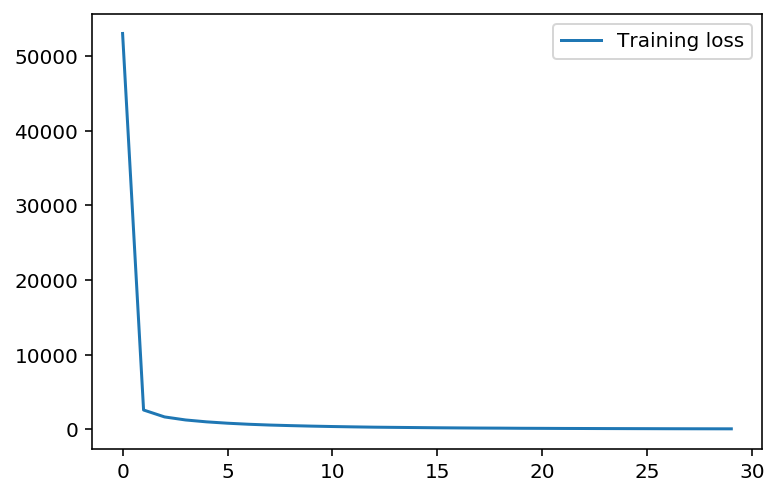

In [9]:
# Rede Neural 3 - Plot
plt.plot(losses['train'], label='Training loss')
plt.legend()
_ = plt.ylim()

In [10]:
success = 0
results = {'actual':[], 'predicted':[]}
for i in range(len(test_X)):
    predicted = sess.run(final_output, feed_dict={X: [test_X[i]], rate:0})
    results['actual'].append(np.argmax(test_y[i]))
    results['predicted'].append(np.argmax(predicted))
    if np.argmax(test_y[i]) == np.argmax(predicted):
        success += 1
    #print('Actual:', test_y[i], 'Predicted:', np.rint(predicted))

print('Accuracy:', success/len(test_X))

print('Confusion Matrix:')
print(confusion_matrix(results['actual'], results['predicted']))

Accuracy: 0.9731
Confusion Matrix:
[[ 969    0    0    2    1    2    3    1    1    1]
 [   0 1124    1    4    0    1    2    0    3    0]
 [   7    1  998    8    3    1    1    8    4    1]
 [   0    0    1  993    1    5    0    4    3    3]
 [   0    0    2    1  956    0    5    4    2   12]
 [   3    0    0   11    1  865    5    2    3    2]
 [   6    3    1    0    3    8  936    0    1    0]
 [   2    3    9    7    1    0    0  998    1    7]
 [   4    2    4   11    8    6    3    7  926    3]
 [   2    3    0    6   14   10    1    6    1  966]]
